In [1096]:
using StatsPlots, Plots, Plots.PlotMeasures
using JLD2
include("/Users/joshua/Documents/QuantumInspiredML/Sampling/ForecastingMain.jl");

In [249]:
function extract_name(filepath::String)
    last_slash_pos = findlast(c -> c in ['/','\\'], filepath)
    
    if last_slash_pos !== nothing
        extracted = filepath[last_slash_pos+1:end-5]
    else
        extracted = filepath[1:end-5]
    end
    return rstrip(extracted, ['_', 'r', 'e', 's', 'u', 'l', 't', 's'])
end

extract_name (generic function with 1 method)

In [387]:
function load_dataset(fname::String)
    loaded_f = jldopen(fname)
    base_name = extract_name(fname)
    
    mean_overall = Float64[]
    mode_overall = Float64[]
    
    for c in ["_c0", "_c1"]
        data = loaded_f[base_name * c]
        for tu in data
            push!(mean_overall, tu[1][:MSE])
            push!(mode_overall, tu[2][:MSE])
        end
    end
    
    @assert (length(mean_overall) == 100 && length(mode_overall) == 100)
    return mean_overall, mode_overall
end

load_dataset (generic function with 2 methods)

# Fourier Results

Chi = 15

In [1056]:
me_fourier_d2_chi15, mo_fourier_d2_chi15 = load_dataset("new/results/fourier_d2_chi15_results.jld2");
me_fourier_d4_chi15, mo_fourier_d4_chi15 = load_dataset("new/results/fourier_d4_chi15_results.jld2");
me_fourier_d6_chi15, mo_fourier_d6_chi15 = load_dataset("new/results/fourier_d6_chi15_results.jld2");
me_fourier_d8_chi15, mo_fourier_d8_chi15 = load_dataset("new/results/fourier_d8_chi15_results.jld2");
me_fourier_d10_chi15, mo_fourier_d10_chi15 = load_dataset("new/results/fourier_d10_chi15_results.jld2");

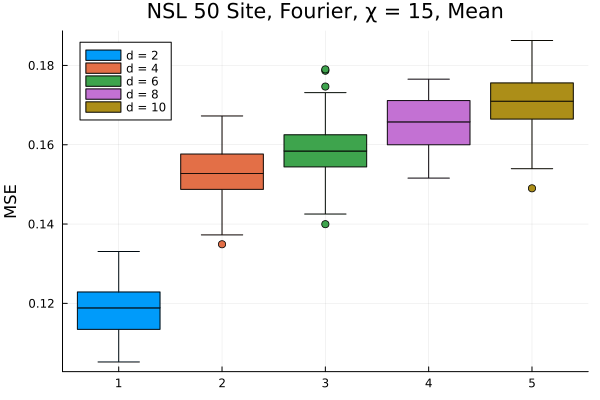

In [1057]:
b1 = boxplot(me_fourier_d2_chi15, label="d = 2", ylabel="MSE", title="NSL 50 Site, Fourier, χ = 15, Mean")
b1 = boxplot!(me_fourier_d4_chi15, label = "d = 4")
b1 = boxplot!(me_fourier_d6_chi15, label = "d = 6")
b1 = boxplot!(me_fourier_d8_chi15, label = "d = 8")
b1 = boxplot!(me_fourier_d10_chi15, label = "d = 10")

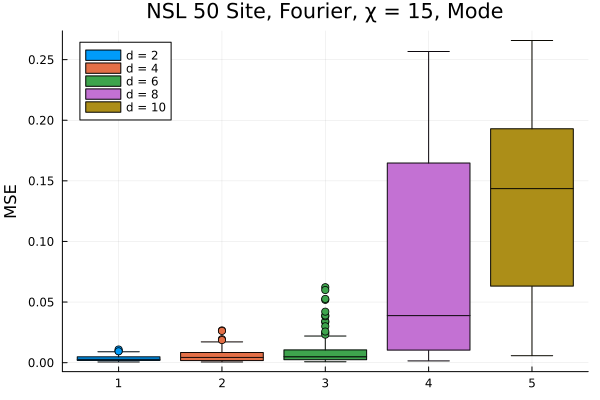

In [1059]:
b2 = boxplot(mo_fourier_d2_chi15, label="d = 2", ylabel="MSE", title="NSL 50 Site, Fourier, χ = 15, Mode")
b2 = boxplot!(mo_fourier_d4_chi15, label = "d = 4")
b2 = boxplot!(mo_fourier_d6_chi15, label = "d = 6")
b2 = boxplot!(mo_fourier_d8_chi15, label = "d = 8")
b2 = boxplot!(mo_fourier_d10_chi15, label = "d = 10")

### Increasing chi 

In [1098]:
me_fourier_d2_chi20, mo_fourier_d2_chi20 = load_dataset("new/results/fourier_d2_chi20_results.jld2");
me_fourier_d2_chi25, mo_fourier_d2_chi25 = load_dataset("new/results/fourier_d2_chi25_results.jld2");
me_fourier_d2_chi30, mo_fourier_d2_chi30 = load_dataset("new/results/fourier_d2_chi30_results.jld2");
me_fourier_d4_chi20, mo_fourier_d4_chi20 = load_dataset("new/results/fourier_d4_chi20_results.jld2");
me_fourier_d4_chi25, mo_fourier_d4_chi25 = load_dataset("new/results/fourier_d4_chi25_results.jld2");
me_fourier_d4_chi35, mo_fourier_d4_chi35 = load_dataset("new/results/fourier_d4_chi35_results.jld2");
me_fourier_d6_chi20, mo_fourier_d6_chi20 = load_dataset("new/results/fourier_d6_chi20_results.jld2");
me_fourier_d6_chi25, mo_fourier_d6_chi25 = load_dataset("new/results/fourier_d6_chi25_results.jld2");
me_fourier_d8_chi20, mo_fourier_d8_chi20 = load_dataset("new/results/fourier_d8_chi20_results.jld2");
me_fourier_d8_chi25, mo_fourier_d8_chi25 = load_dataset("new/results/fourier_d8_chi25_results.jld2");

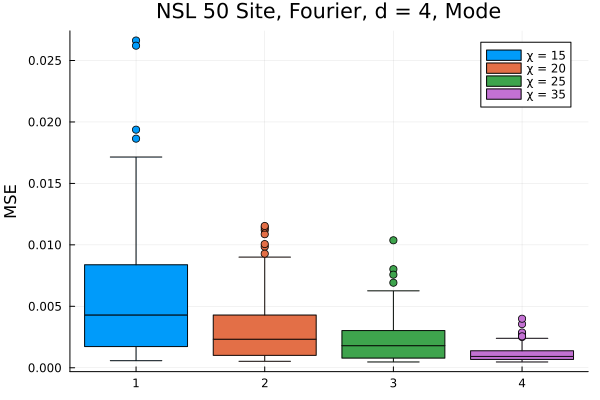

In [1103]:
b2 = boxplot(mo_fourier_d4_chi15, label = "χ = 15", 
    title="NSL 50 Site, Fourier, d = 4, Mode", ylabel="MSE")
b2 = boxplot!(mo_fourier_d4_chi20, label = "χ = 20")
b2 = boxplot!(mo_fourier_d4_chi25, label = "χ = 25")
b2 = boxplot!(mo_fourier_d4_chi35, label = "χ = 35")

In [1104]:
savefig("/Users/joshua/Documents/QuantumInspiredML/Sampling/benchmarking/nsl/encoding_comparison_plots/fourier_d4_variable_chi_mode.svg")

"/Users/joshua/Documents/QuantumInspiredML/Sampling/benchmarking/nsl/encoding_comparison_plots/fourier_d4_variable_chi_mode.svg"

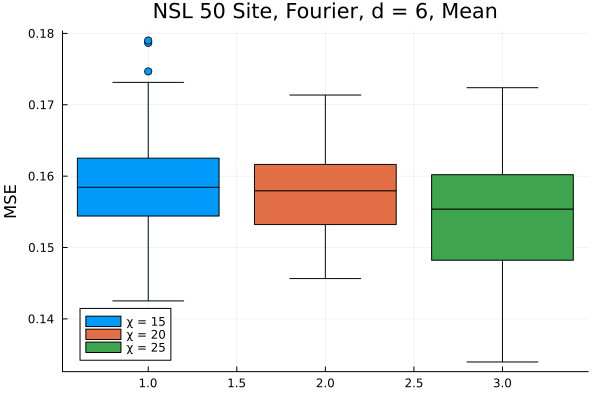

In [1107]:
b2 = boxplot(me_fourier_d6_chi15, label = "χ = 15", 
    title="NSL 50 Site, Fourier, d = 6, Mean", ylabel="MSE")
b2 = boxplot!(me_fourier_d6_chi20, label = "χ = 20")
b2 = boxplot!(me_fourier_d6_chi25, label = "χ = 25")

In [1108]:
savefig("/Users/joshua/Documents/QuantumInspiredML/Sampling/benchmarking/nsl/encoding_comparison_plots/fourier_d6_variable_chi_mean.svg")

"/Users/joshua/Documents/QuantumInspiredML/Sampling/benchmarking/nsl/encoding_comparison_plots/fourier_d6_variable_chi_mean.svg"

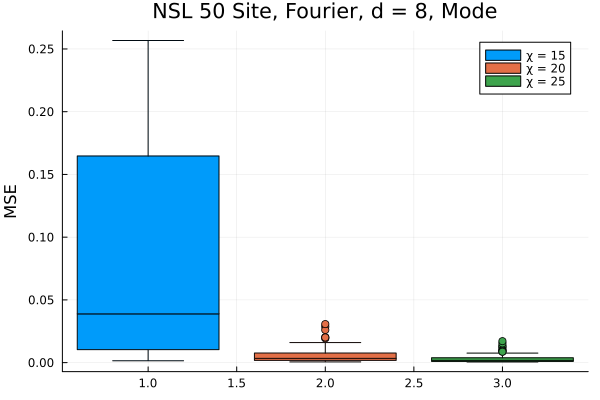

In [1112]:
b2 = boxplot(mo_fourier_d8_chi15, label = "χ = 15", 
    title="NSL 50 Site, Fourier, d = 8, Mode", ylabel="MSE")
b2 = boxplot!(mo_fourier_d8_chi20, label = "χ = 20")
b2 = boxplot!(mo_fourier_d8_chi25, label = "χ = 25")

In [1113]:
savefig("/Users/joshua/Documents/QuantumInspiredML/Sampling/benchmarking/nsl/encoding_comparison_plots/fourier_d8_variable_chi_mode.svg")

"/Users/joshua/Documents/QuantumInspiredML/Sampling/benchmarking/nsl/encoding_comparison_plots/fourier_d8_variable_chi_mode.svg"

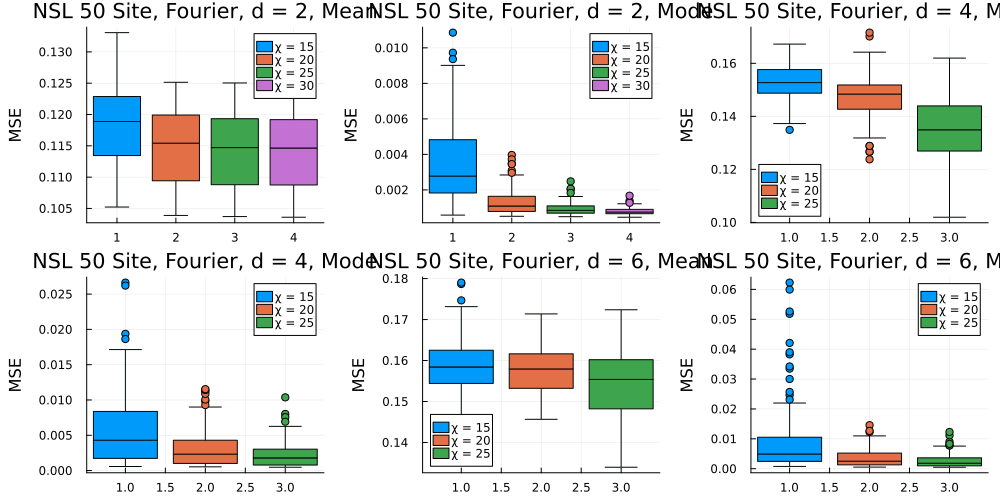

In [602]:
b2 = boxplot(me_fourier_d2_chi15, label = "χ = 15", 
    title="NSL 50 Site, Fourier, d = 2, Mean", ylabel="MSE")
b2 = boxplot!(me_fourier_d2_chi20, label = "χ = 20")
b2 = boxplot!(me_fourier_d2_chi25, label = "χ = 25")
b2 = boxplot!(me_fourier_d2_chi30, label = "χ = 30")

b3 = boxplot(mo_fourier_d2_chi15, label = "χ = 15", 
    title="NSL 50 Site, Fourier, d = 2, Mode", ylabel="MSE")
b3 = boxplot!(mo_fourier_d2_chi20, label = "χ = 20")
b3 = boxplot!(mo_fourier_d2_chi25, label = "χ = 25")
b3 = boxplot!(mo_fourier_d2_chi30, label = "χ = 30")

b4 = boxplot(me_fourier_d4_chi15, label = "χ = 15", 
    title="NSL 50 Site, Fourier, d = 4, Mean", ylabel="MSE")
b4 = boxplot!(me_fourier_d4_chi20, label = "χ = 20")
b4 = boxplot!(me_fourier_d4_chi25, label = "χ = 25")

b5 = boxplot(mo_fourier_d4_chi15, label = "χ = 15", 
    title="NSL 50 Site, Fourier, d = 4, Mode", ylabel="MSE")
b5 = boxplot!(mo_fourier_d4_chi20, label = "χ = 20")
b5 = boxplot!(mo_fourier_d4_chi25, label = "χ = 25")

b6 = boxplot(me_fourier_d6_chi15, label = "χ = 15", 
    title="NSL 50 Site, Fourier, d = 6, Mean", ylabel="MSE")
b6 = boxplot!(me_fourier_d6_chi20, label = "χ = 20")
b6 = boxplot!(me_fourier_d6_chi25, label = "χ = 25")

b7 = boxplot(mo_fourier_d6_chi15, label = "χ = 15", 
    title="NSL 50 Site, Fourier, d = 6, Mode", ylabel="MSE")
b7 = boxplot!(mo_fourier_d6_chi20, label = "χ = 20")
b7 = boxplot!(mo_fourier_d6_chi25, label = "χ = 25")


plot(b2, b3, b4, b5, b6, b7, size=(1000, 500), left_margin=5mm)

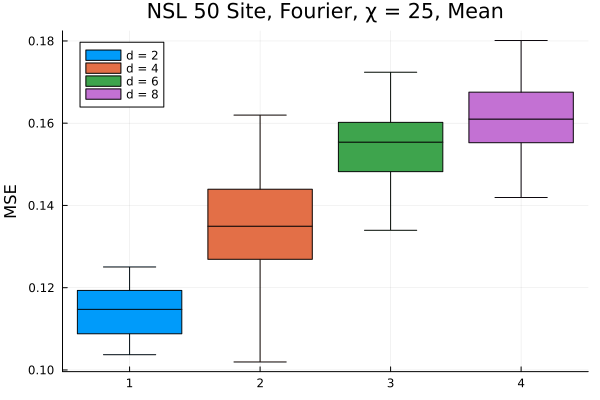

In [1133]:
b2 = boxplot(me_fourier_d2_chi25, label = "d = 2", 
    title="NSL 50 Site, Fourier, χ = 25, Mean", ylabel="MSE")
b2 = boxplot!(me_fourier_d4_chi25, label = "d = 4")
b2 = boxplot!(me_fourier_d6_chi25, label = "d = 6")
b2 = boxplot!(me_fourier_d8_chi25, label = "d = 8")

In [1134]:
savefig("/Users/joshua/Documents/QuantumInspiredML/Sampling/benchmarking/nsl/encoding_comparison_plots/fourier_d2_variable_d_mean.svg")

"/Users/joshua/Documents/QuantumInspiredML/Sampling/benchmarking/nsl/encoding_comparison_plots/fourier_d2_variable_d_mean.svg"

# Stoudenmire Encoding

In [1089]:
me_stoudenmire_d2_chi10, mo_stoudenmire_d2_chi10 = load_dataset("../stoudenmire/new/stoudenmire_d2_chi10_results.jld2");
me_stoudenmire_d2_chi15, mo_stoudenmire_d2_chi15 = load_dataset("../stoudenmire/new/stoudenmire_d2_chi15_results.jld2");
me_stoudenmire_d2_chi20, mo_stoudenmire_d2_chi20 = load_dataset("../stoudenmire/new/stoudenmire_d2_chi20_results.jld2");
me_stoudenmire_d2_chi25, mo_stoudenmire_d2_chi25 = load_dataset("../stoudenmire/new/stoudenmire_d2_chi25_results.jld2");
me_stoudenmire_d2_chi30, mo_stoudenmire_d2_chi30 = load_dataset("../stoudenmire/new/stoudenmire_d2_chi30_results.jld2");
me_stoudenmire_d2_chi35, mo_stoudenmire_d2_chi35 = load_dataset("../stoudenmire/new/stoudenmire_d2_chi35_results.jld2");
me_stoudenmire_d2_chi50, mo_stoudenmire_d2_chi50 = load_dataset("../stoudenmire/new/stoudenmire_d2_chi50_results.jld2");
me_stoudenmire_d2_chi80, mo_stoudenmire_d2_chi80 = load_dataset("../stoudenmire/new/stoudenmire_d2_chi80_results.jld2");

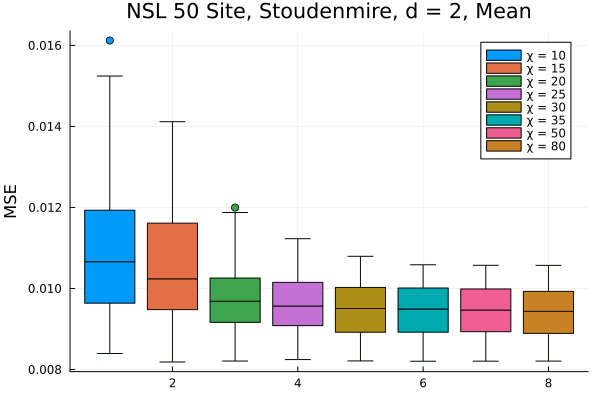

In [1120]:
boxplot(me_stoudenmire_d2_chi10, label="χ = 10", ylabel="MSE", title="NSL 50 Site, Stoudenmire, d = 2, Mean")
boxplot!(me_stoudenmire_d2_chi15, label="χ = 15")
boxplot!(me_stoudenmire_d2_chi20, label="χ = 20")
boxplot!(me_stoudenmire_d2_chi25, label="χ = 25")
boxplot!(me_stoudenmire_d2_chi30, label="χ = 30")
boxplot!(me_stoudenmire_d2_chi35, label="χ = 35")
boxplot!(me_stoudenmire_d2_chi50, label="χ = 50")
boxplot!(me_stoudenmire_d2_chi80, label="χ = 80")

In [1121]:
savefig("/Users/joshua/Documents/QuantumInspiredML/Sampling/benchmarking/nsl/encoding_comparison_plots/stoudenmire_d2_variable_chi_mean.svg")

"/Users/joshua/Documents/QuantumInspiredML/Sampling/benchmarking/nsl/encoding_comparison_plots/stoudenmire_d2_variable_chi_mean.svg"

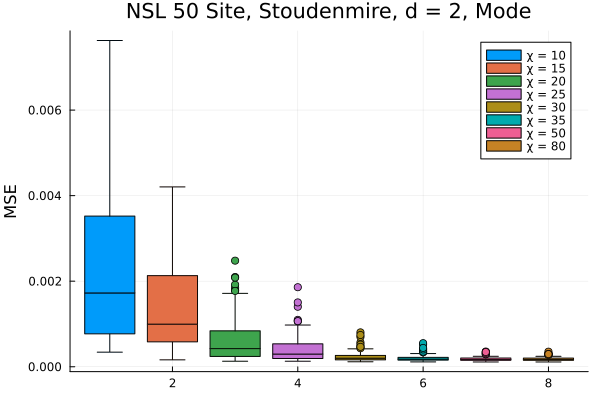

In [1122]:
boxplot(mo_stoudenmire_d2_chi10, label="χ = 10", ylabel="MSE", title="NSL 50 Site, Stoudenmire, d = 2, Mode")
boxplot!(mo_stoudenmire_d2_chi15, label="χ = 15")
boxplot!(mo_stoudenmire_d2_chi20, label="χ = 20")
boxplot!(mo_stoudenmire_d2_chi25, label="χ = 25")
boxplot!(mo_stoudenmire_d2_chi30, label="χ = 30")
boxplot!(mo_stoudenmire_d2_chi35, label="χ = 35")
boxplot!(mo_stoudenmire_d2_chi50, label="χ = 50")
boxplot!(mo_stoudenmire_d2_chi80, label="χ = 80")

In [1123]:
savefig("/Users/joshua/Documents/QuantumInspiredML/Sampling/benchmarking/nsl/encoding_comparison_plots/stoudenmire_d2_variable_chi_mode.svg")

"/Users/joshua/Documents/QuantumInspiredML/Sampling/benchmarking/nsl/encoding_comparison_plots/stoudenmire_d2_variable_chi_mode.svg"

# Legendre

Chi = 15

In [1125]:
me_legendre_d2_chi15, mo_legendre_d2_chi15 = load_dataset("../legendre/legendre_d2_chi15_results.jld2");
me_legendre_d4_chi15, mo_legendre_d4_chi15 = load_dataset("../legendre/legendre_d4_chi15_results.jld2");
me_legendre_d6_chi15, mo_legendre_d6_chi15 = load_dataset("../legendre/legendre_d6_chi15_results.jld2");
me_legendre_d8_chi15, mo_legendre_d8_chi15 = load_dataset("../legendre/legendre_d8_chi15_results.jld2");

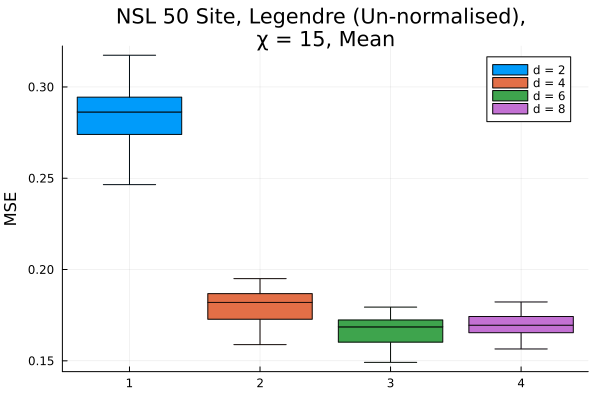

In [1126]:
boxplot(me_legendre_d2_chi15, label = "d = 2", ylabel="MSE", title="NSL 50 Site, Legendre (Un-normalised), \nχ = 15, Mean")
boxplot!(me_legendre_d4_chi15, label = "d = 4")
boxplot!(me_legendre_d6_chi15, label = "d = 6")
boxplot!(me_legendre_d8_chi15, label = "d = 8")

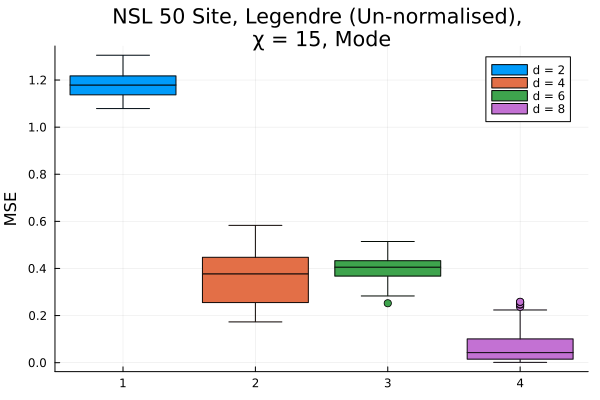

In [329]:
boxplot(mo_legendre_d2_chi15, label = "d = 2", ylabel="MSE", title="NSL 50 Site, Legendre (Un-normalised), \nχ = 15, Mode")
boxplot!(mo_legendre_d4_chi15, label = "d = 4")
boxplot!(mo_legendre_d6_chi15, label = "d = 6")
boxplot!(mo_legendre_d8_chi15, label = "d = 8")

Different chis

In [433]:
me_legendre_d2_chi20, mo_legendre_d2_chi20 = load_dataset("../legendre/legendre_d2_chi20_results.jld2");
me_legendre_d2_chi25, mo_legendre_d2_chi25 = load_dataset("../legendre/legendre_d2_chi25_results.jld2");
me_legendre_d2_chi35, mo_legendre_d2_chi35 = load_dataset("../legendre/legendre_d2_chi35_results.jld2");

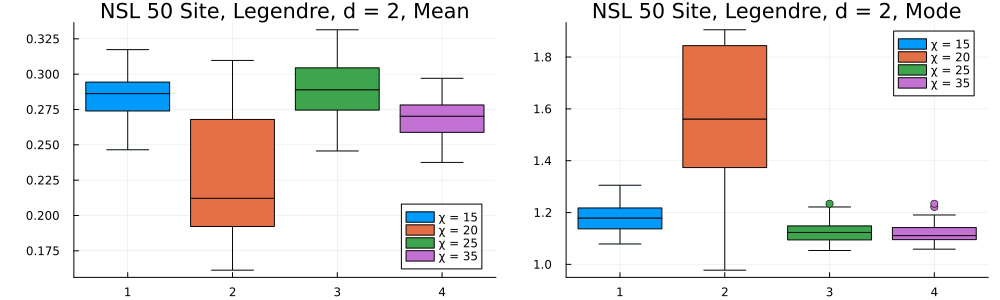

In [434]:
p1 = boxplot(me_legendre_d2_chi15, label = "χ = 15", 
    title="NSL 50 Site, Legendre, d = 2, Mean")
p1 = boxplot!(me_legendre_d2_chi20, label = "χ = 20")
p1 = boxplot!(me_legendre_d2_chi25, label = "χ = 25")
p1 = boxplot!(me_legendre_d2_chi35, label = "χ = 35")

p2 = boxplot(mo_legendre_d2_chi15, label = "χ = 15", 
    title="NSL 50 Site, Legendre, d = 2, Mode")
p2 = boxplot!(mo_legendre_d2_chi20, label = "χ = 20") 
p2 = boxplot!(mo_legendre_d2_chi25, label = "χ = 25")
p2 = boxplot!(mo_legendre_d2_chi35, label = "χ = 35")

plot(p1, p2, size=(1000, 300), left_margin=5mm)

In [435]:
me_legendre_d4_chi20, mo_legendre_d4_chi20 = load_dataset("../legendre/legendre_d4_chi20_results.jld2");
me_legendre_d4_chi25, mo_legendre_d4_chi25 = load_dataset("../legendre/legendre_d4_chi25_results.jld2");
me_legendre_d4_chi35, mo_legendre_d4_chi35 = load_dataset("../legendre/legendre_d4_chi35_results.jld2");

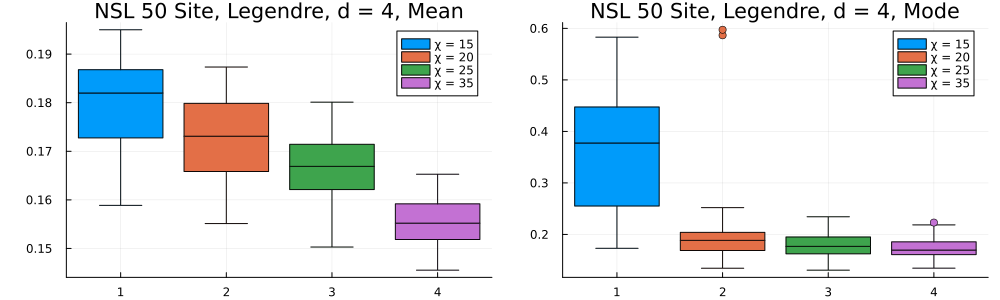

In [437]:
p1 = boxplot(me_legendre_d4_chi15, label = "χ = 15", 
    title="NSL 50 Site, Legendre, d = 4, Mean")
p1 = boxplot!(me_legendre_d4_chi20, label = "χ = 20")
p1 = boxplot!(me_legendre_d4_chi25, label = "χ = 25")
p1 = boxplot!(me_legendre_d4_chi35, label = "χ = 35")


p2 = boxplot(mo_legendre_d4_chi15, label = "χ = 15", 
    title="NSL 50 Site, Legendre, d = 4, Mode")
p2 = boxplot!(mo_legendre_d4_chi20, label = "χ = 20")
p2 = boxplot!(mo_legendre_d4_chi25, label = "χ = 25")
p2 = boxplot!(mo_legendre_d4_chi35, label = "χ = 35")

plot(p1, p2, size=(1000, 300), left_margin=5mm)

In [438]:
me_legendre_d6_chi20, mo_legendre_d6_chi20 = load_dataset("../legendre/legendre_d6_chi20_results.jld2");
me_legendre_d6_chi25, mo_legendre_d6_chi25 = load_dataset("../legendre/legendre_d6_chi25_results.jld2");
me_legendre_d6_chi35, mo_legendre_d6_chi35 = load_dataset("../legendre/legendre_d6_chi35_results.jld2");

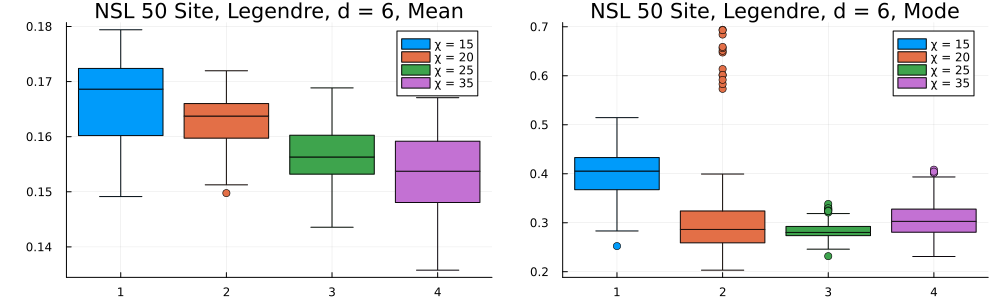

In [441]:
p1 = boxplot(me_legendre_d6_chi15, label = "χ = 15", 
    title="NSL 50 Site, Legendre, d = 6, Mean")
p1 = boxplot!(me_legendre_d6_chi20, label = "χ = 20")
p1 = boxplot!(me_legendre_d6_chi25, label = "χ = 25")
p1 = boxplot!(me_legendre_d6_chi35, label = "χ = 35")

p2 = boxplot(mo_legendre_d6_chi15, label = "χ = 15", 
    title="NSL 50 Site, Legendre, d = 6, Mode")
p2 = boxplot!(mo_legendre_d6_chi20, label = "χ = 20")
p2 = boxplot!(mo_legendre_d6_chi25, label = "χ = 25")
p2 = boxplot!(mo_legendre_d6_chi35, label = "χ = 35")

plot(p1, p2, size=(1000, 300), left_margin=5mm)

In [442]:
me_legendre_d8_chi20, mo_legendre_d8_chi20 = load_dataset("../legendre/legendre_d8_chi20_results.jld2");
me_legendre_d8_chi25, mo_legendre_d8_chi25 = load_dataset("../legendre/legendre_d8_chi25_results.jld2");
me_legendre_d8_chi35, mo_legendre_d8_chi35 = load_dataset("../legendre/legendre_d8_chi35_results.jld2");

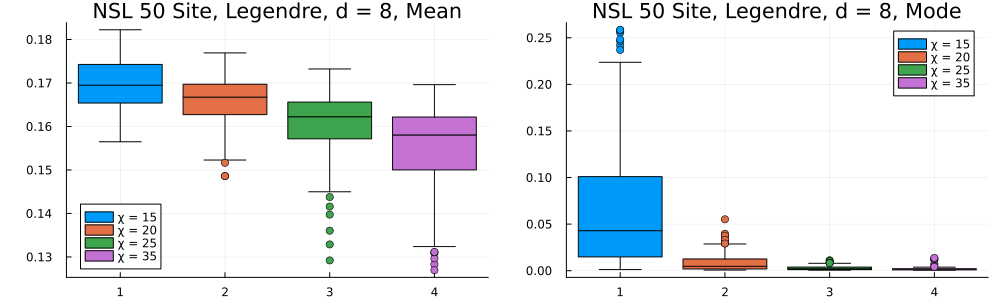

In [1169]:
p1 = boxplot(me_legendre_d8_chi15, label = "χ = 15", 
    title="NSL 50 Site, Legendre, d = 8, Mean")
p1 = boxplot!(me_legendre_d8_chi20, label = "χ = 20")
p1 = boxplot!(me_legendre_d8_chi25, label = "χ = 25")
p1 = boxplot!(me_legendre_d8_chi35, label = "χ = 35")

p2 = boxplot(mo_legendre_d8_chi15, label = "χ = 15", 
    title="NSL 50 Site, Legendre, d = 8, Mode")
p2 = boxplot!(mo_legendre_d8_chi20, label = "χ = 20")
p2 = boxplot!(mo_legendre_d8_chi25, label = "χ = 25")
p2 = boxplot!(mo_legendre_d8_chi35, label = "χ = 35")

plot(p1, p2, size=(1000, 300), left_margin=5mm)

In [1170]:
savefig("/Users/joshua/Documents/QuantumInspiredML/Sampling/benchmarking/nsl/encoding_comparison_plots/legendre_d8_variable_chi.svg")

"/Users/joshua/Documents/QuantumInspiredML/Sampling/benchmarking/nsl/encoding_comparison_plots/legendre_d8_variable_chi.svg"

# Sahand Encoding

In [1127]:
me_sahand_d2_chi15, mo_sahand_d2_chi15 = load_dataset("../sahand/results/sahand_d2_chi15_results.jld2");
me_sahand_d4_chi15, mo_sahand_d4_chi15 = load_dataset("../sahand/results/sahand_d4_chi15_results.jld2");
me_sahand_d6_chi15, mo_sahand_d6_chi15 = load_dataset("../sahand/results/sahand_d6_chi15_results.jld2");
me_sahand_d8_chi15, mo_sahand_d8_chi15 = load_dataset("../sahand/results/sahand_d8_chi15_results.jld2");

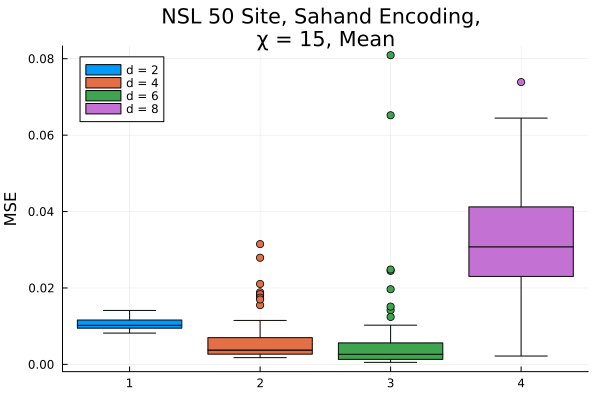

In [1150]:
boxplot(me_sahand_d2_chi15, label="d = 2", ylabel="MSE", title="NSL 50 Site, Sahand Encoding, \nχ = 15, Mean")
boxplot!(me_sahand_d4_chi15, label="d = 4")
boxplot!(me_sahand_d6_chi15, label="d = 6")
boxplot!(me_sahand_d8_chi15, label="d = 8")

In [1151]:
savefig("/Users/joshua/Documents/QuantumInspiredML/Sampling/benchmarking/nsl/encoding_comparison_plots/sahand_chi15_variable_d_mean.svg")

"/Users/joshua/Documents/QuantumInspiredML/Sampling/benchmarking/nsl/encoding_comparison_plots/sahand_chi15_variable_d_mean.svg"

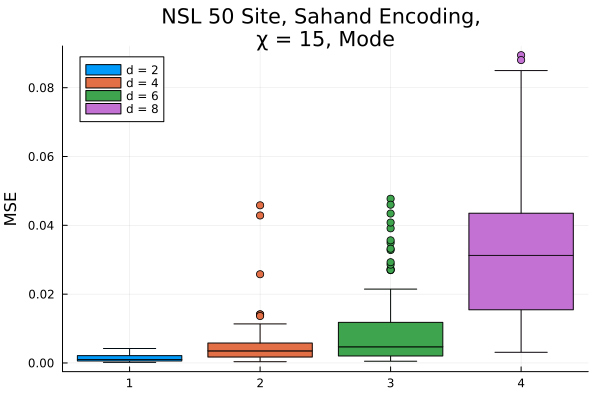

In [1152]:
boxplot(mo_sahand_d2_chi15, label="d = 2", ylabel="MSE", title="NSL 50 Site, Sahand Encoding, \nχ = 15, Mode")
boxplot!(mo_sahand_d4_chi15, label="d = 4")
boxplot!(mo_sahand_d6_chi15, label="d = 6")
boxplot!(mo_sahand_d8_chi15, label="d = 8")

In [1153]:
savefig("/Users/joshua/Documents/QuantumInspiredML/Sampling/benchmarking/nsl/encoding_comparison_plots/sahand_chi15_variable_d_mode.svg")

"/Users/joshua/Documents/QuantumInspiredML/Sampling/benchmarking/nsl/encoding_comparison_plots/sahand_chi15_variable_d_mode.svg"

Different chi

In [1141]:
me_sahand_d2_chi20, mo_sahand_d2_chi20 = load_dataset("../sahand/results/sahand_d2_chi20_results.jld2");
me_sahand_d2_chi25, mo_sahand_d2_chi25 = load_dataset("../sahand/results/sahand_d2_chi25_results.jld2");

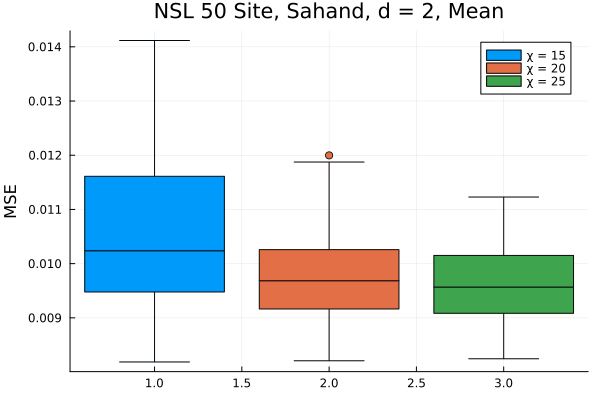

In [1156]:
p1 = boxplot(me_sahand_d2_chi15, label="χ = 15", 
    title="NSL 50 Site, Sahand, d = 2, Mean", ylabel="MSE")
p1 = boxplot!(me_sahand_d2_chi20, label="χ = 20")
p1 = boxplot!(me_sahand_d2_chi25, label="χ = 25")


In [1157]:
savefig("/Users/joshua/Documents/QuantumInspiredML/Sampling/benchmarking/nsl/encoding_comparison_plots/sahand_d2_chi_variable_mean.svg")

"/Users/joshua/Documents/QuantumInspiredML/Sampling/benchmarking/nsl/encoding_comparison_plots/sahand_d2_chi_variable_mean.svg"

In [447]:
me_sahand_d4_chi20, mo_sahand_d4_chi20 = load_dataset("../sahand/results/sahand_d4_chi20_results.jld2");
me_sahand_d4_chi25, mo_sahand_d4_chi25 = load_dataset("../sahand/results/sahand_d4_chi25_results.jld2");

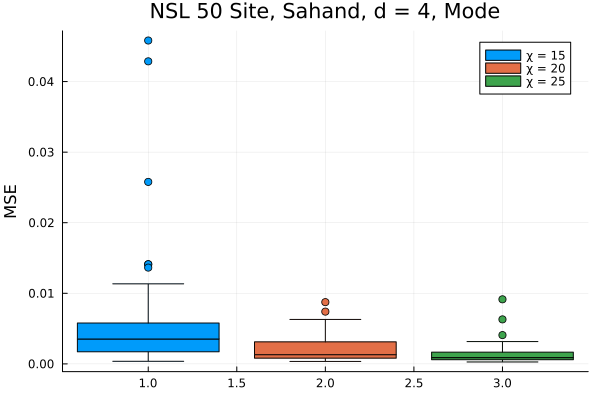

In [1158]:
p1 = boxplot(mo_sahand_d4_chi15, label="χ = 15", 
    title="NSL 50 Site, Sahand, d = 4, Mode", ylabel="MSE")
p1 = boxplot!(mo_sahand_d4_chi20, label="χ = 20")
p1 = boxplot!(mo_sahand_d4_chi25, label="χ = 25")

In [1159]:
savefig("/Users/joshua/Documents/QuantumInspiredML/Sampling/benchmarking/nsl/encoding_comparison_plots/sahand_d4_chi_variable_mode.svg")

"/Users/joshua/Documents/QuantumInspiredML/Sampling/benchmarking/nsl/encoding_comparison_plots/sahand_d4_chi_variable_mode.svg"

In [449]:
me_sahand_d6_chi20, mo_sahand_d6_chi20 = load_dataset("../sahand/results/sahand_d6_chi20_results.jld2");
me_sahand_d6_chi25, mo_sahand_d6_chi25 = load_dataset("../sahand/results/sahand_d6_chi25_results.jld2");

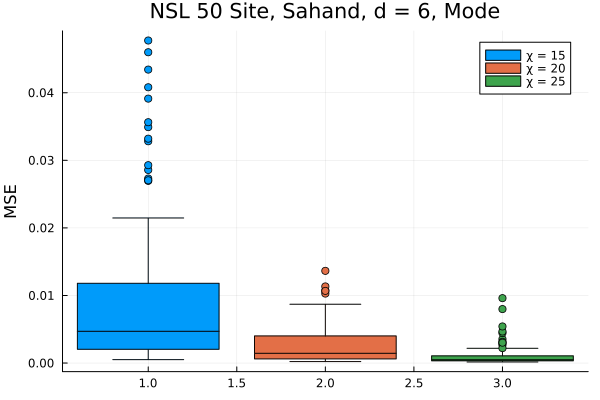

In [1162]:
p1 = boxplot(mo_sahand_d6_chi15, label="χ = 15", 
    title="NSL 50 Site, Sahand, d = 6, Mode", ylabel="MSE")
p1 = boxplot!(mo_sahand_d6_chi20, label="χ = 20")
p1 = boxplot!(mo_sahand_d6_chi25, label="χ = 25")

In [1163]:
savefig("/Users/joshua/Documents/QuantumInspiredML/Sampling/benchmarking/nsl/encoding_comparison_plots/sahand_d6_chi_variable_mode.svg")

"/Users/joshua/Documents/QuantumInspiredML/Sampling/benchmarking/nsl/encoding_comparison_plots/sahand_d6_chi_variable_mode.svg"

In [869]:
me_sahand_d8_chi20, mo_sahand_d8_chi20 = load_dataset("../sahand/results/sahand_d8_chi20_results.jld2");
me_sahand_d8_chi25, mo_sahand_d8_chi25 = load_dataset("../sahand/results/sahand_d8_chi25_results.jld2");

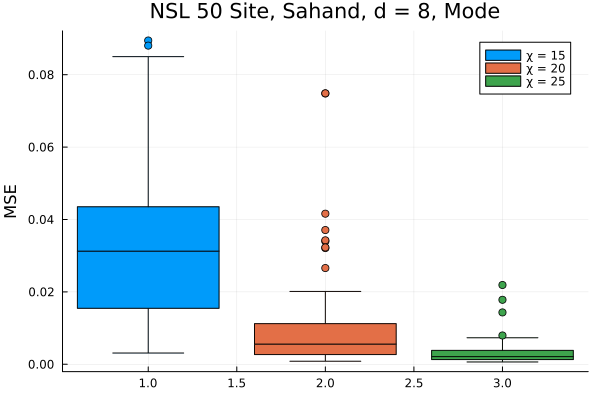

In [1167]:
p1 = boxplot(mo_sahand_d8_chi15, label="χ = 15", 
    title="NSL 50 Site, Sahand, d = 8, Mode", ylabel="MSE")
p1 = boxplot!(mo_sahand_d8_chi20, label="χ = 20")
p1 = boxplot!(mo_sahand_d8_chi25, label="χ = 25")


In [1168]:
savefig("/Users/joshua/Documents/QuantumInspiredML/Sampling/benchmarking/nsl/encoding_comparison_plots/sahand_d8_chi_variable_mode.svg")

"/Users/joshua/Documents/QuantumInspiredML/Sampling/benchmarking/nsl/encoding_comparison_plots/sahand_d8_chi_variable_mode.svg"

Compare encodings:

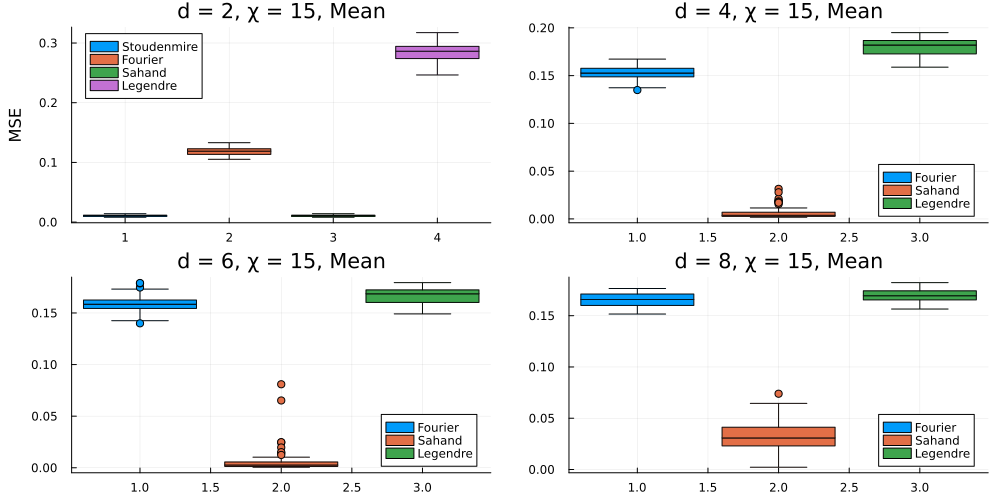

In [421]:
p1 = boxplot(me_stoudenmire_d2_chi15, label="Stoudenmire", ylabel="MSE", title="d = 2, χ = 15, Mean")
p1 = boxplot!(me_fourier_d2_chi15, label="Fourier")
p1 = boxplot!(me_sahand_d2_chi15, label="Sahand")
p1 = boxplot!(me_legendre_d2_chi15, label="Legendre")

p2 = boxplot(me_fourier_d4_chi15, label="Fourier", title="d = 4, χ = 15, Mean")
p2 = boxplot!(me_sahand_d4_chi15, label="Sahand")
p2 = boxplot!(me_legendre_d4_chi15, label="Legendre")

p3 = boxplot(me_fourier_d6_chi15, label="Fourier", title="d = 6, χ = 15, Mean")
p3 = boxplot!(me_sahand_d6_chi15, label="Sahand")
p3 = boxplot!(me_legendre_d6_chi15, label="Legendre")

p4 = boxplot(me_fourier_d8_chi15, label="Fourier", title="d = 8, χ = 15, Mean")
p4 = boxplot!(me_sahand_d8_chi15, label="Sahand")
p4 = boxplot!(me_legendre_d8_chi15, label="Legendre")

plot(p1, p2, p3, p4, size=(1000, 500), left_margin=5mm)

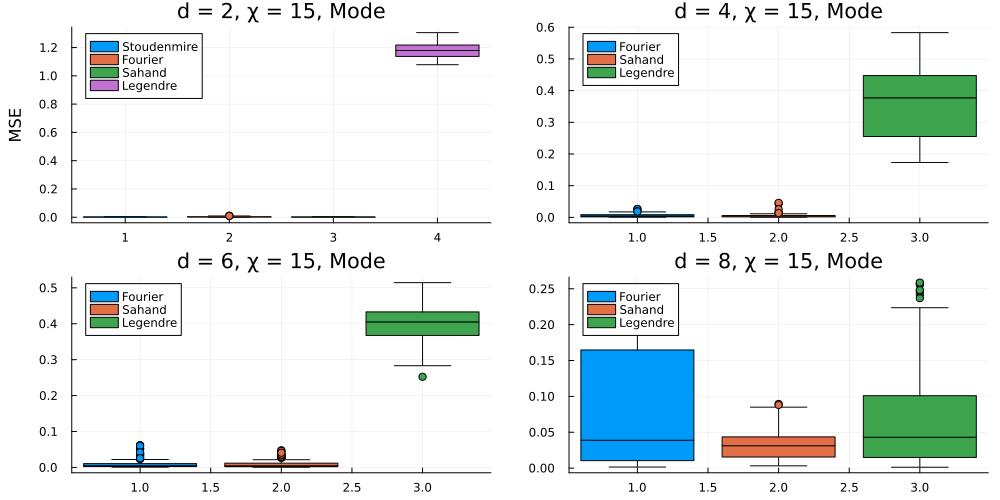

In [452]:
p1 = boxplot(mo_stoudenmire_d2_chi15, label="Stoudenmire", ylabel="MSE", title="d = 2, χ = 15, Mode")
p1 = boxplot!(mo_fourier_d2_chi15, label="Fourier")
p1 = boxplot!(mo_sahand_d2_chi15, label="Sahand")
p1 = boxplot!(mo_legendre_d2_chi15, label="Legendre")

p2 = boxplot(mo_fourier_d4_chi15, label="Fourier", title="d = 4, χ = 15, Mode")
p2 = boxplot!(mo_sahand_d4_chi15, label="Sahand")
p2 = boxplot!(mo_legendre_d4_chi15, label="Legendre")

p3 = boxplot(mo_fourier_d6_chi15, label="Fourier", title="d = 6, χ = 15, Mode")
p3 = boxplot!(mo_sahand_d6_chi15, label="Sahand")
p3 = boxplot!(mo_legendre_d6_chi15, label="Legendre")

p4 = boxplot(mo_fourier_d8_chi15, label="Fourier", title="d = 8, χ = 15, Mode")
p4 = boxplot!(mo_sahand_d8_chi15, label="Sahand")
p4 = boxplot!(mo_legendre_d8_chi15, label="Legendre")

plot(p1, p2, p3, p4, size=(1000, 500), left_margin=5mm)

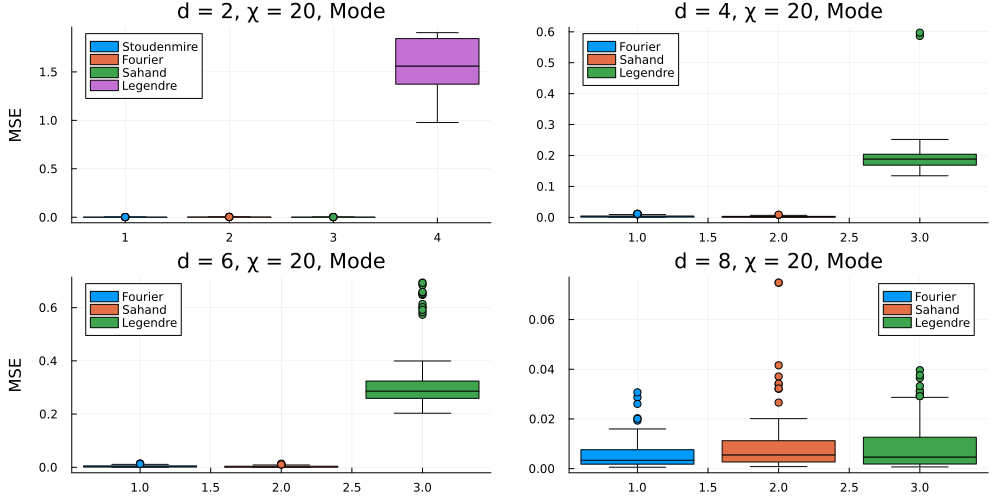

In [459]:
p1 = boxplot(mo_stoudenmire_d2_chi20, label="Stoudenmire", ylabel="MSE", title="d = 2, χ = 20, Mode")
p1 = boxplot!(mo_fourier_d2_chi20, label="Fourier")
p1 = boxplot!(mo_sahand_d2_chi20, label="Sahand")
p1 = boxplot!(mo_legendre_d2_chi20, label="Legendre")

p2 = boxplot(mo_fourier_d4_chi20, label="Fourier", title="d = 4, χ = 20, Mode")
p2 = boxplot!(mo_sahand_d4_chi20, label="Sahand")
p2 = boxplot!(mo_legendre_d4_chi20, label="Legendre")

p3 = boxplot(mo_fourier_d6_chi20, label="Fourier", title="d = 6, χ = 20, Mode", ylabel="MSE")
p3 = boxplot!(mo_sahand_d6_chi20, label="Sahand")
p3 = boxplot!(mo_legendre_d6_chi20, label="Legendre")

p4 = boxplot(mo_fourier_d8_chi20, label="Fourier", title="d = 8, χ = 20, Mode")
p4 = boxplot!(mo_sahand_d8_chi20, label="Sahand")
p4 = boxplot!(mo_legendre_d8_chi20, label="Legendre")

plot(p1, p2, p3, p4, size=(1000, 500), left_margin=5mm)

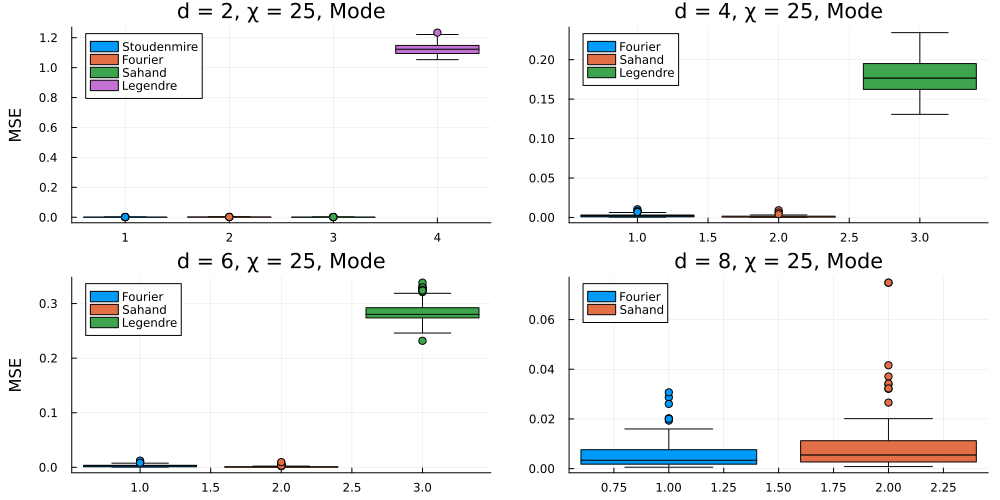

In [463]:
p1 = boxplot(mo_stoudenmire_d2_chi25, label="Stoudenmire", ylabel="MSE", title="d = 2, χ = 25, Mode")
p1 = boxplot!(mo_fourier_d2_chi25, label="Fourier")
p1 = boxplot!(mo_sahand_d2_chi25, label="Sahand")
p1 = boxplot!(mo_legendre_d2_chi25, label="Legendre")

p2 = boxplot(mo_fourier_d4_chi25, label="Fourier", title="d = 4, χ = 25, Mode")
p2 = boxplot!(mo_sahand_d4_chi25, label="Sahand")
p2 = boxplot!(mo_legendre_d4_chi25, label="Legendre")

p3 = boxplot(mo_fourier_d6_chi25, label="Fourier", title="d = 6, χ = 25, Mode", ylabel="MSE")
p3 = boxplot!(mo_sahand_d6_chi25, label="Sahand")
p3 = boxplot!(mo_legendre_d6_chi25, label="Legendre")

p4 = boxplot(mo_fourier_d8_chi20, label="Fourier", title="d = 8, χ = 25, Mode")
p4 = boxplot!(mo_sahand_d8_chi20, label="Sahand")
# p4 = boxplot!(mo_legendre_d8_chi20, label="Legendre")

plot(p1, p2, p3,p4, size=(1000, 500), left_margin=5mm)

In [1079]:
mps_loc = "/Users/joshua/Documents/QuantumInspiredML/Sampling/benchmarking/nsl/stoudenmire/stoudenmire_d2_chi80.jld2"
data_loc = "/Users/joshua/Documents/QuantumInspiredML/Sampling/benchmarking/nsl/nsl_A1_f4_sig02_test_scaled_01.jld2";

In [1080]:
fcast = unpack_class_states_and_samples(mps_loc, data_loc);

Data in range [0, 1]
Dataset has 100 samples.
Class 0 mps has local dimension: 2 and 100 sites.
Class 1 mps has local dimension: 2 and 100 sites.


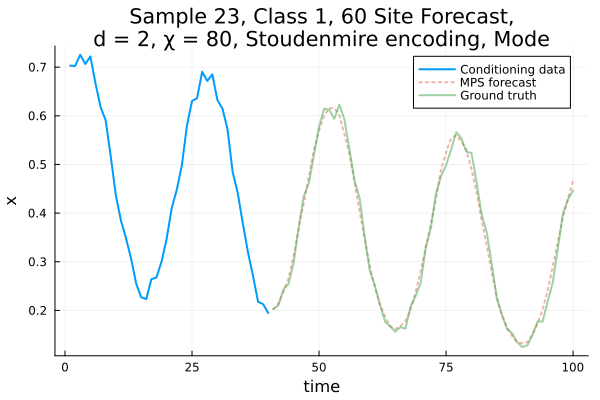

┌────────┬─────────────┐
│ Metric │       Value │
├────────┼─────────────┤
│  SMAPE │   0.0345527 │
│    MSE │ 0.000210639 │
│   MAPE │   0.0350525 │
│    MAE │   0.0112753 │
│   RMSE │ 0.000210639 │
└────────┴─────────────┘


In [1081]:
forecast_single_time_series_mode_analytic(fcast, 1, 23, 60, Basis("Stoudenmire"));

In [1082]:
savefig("/Users/joshua/Documents/QuantumInspiredML/Sampling/benchmarking/nsl/stoudenmire/plots/stoudenmire_d2_chi80_s1.svg")

"/Users/joshua/Documents/QuantumInspiredML/Sampling/benchmarking/nsl/stoudenmire/plots/stoudenmire_d2_chi80_s1.svg"

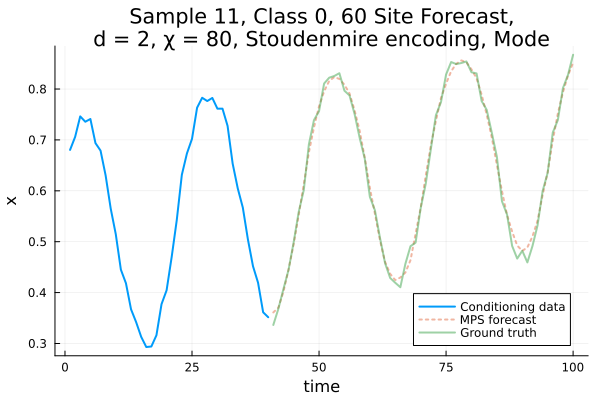

┌────────┬────────────┐
│ Metric │      Value │
├────────┼────────────┤
│  SMAPE │  0.0181189 │
│    MSE │ 0.00017001 │
│   MAPE │  0.0182508 │
│    MAE │  0.0106229 │
│   RMSE │ 0.00017001 │
└────────┴────────────┘


In [1083]:
forecast_single_time_series_mode_analytic(fcast, 0, 11, 60, Basis("Stoudenmire"));

In [1084]:
savefig("/Users/joshua/Documents/QuantumInspiredML/Sampling/benchmarking/nsl/stoudenmire/plots/stoudenmire_d2_chi80_s2.svg")

"/Users/joshua/Documents/QuantumInspiredML/Sampling/benchmarking/nsl/stoudenmire/plots/stoudenmire_d2_chi80_s2.svg"

In [1117]:
median(mo_fourier_d4_chi35)

0.0009227841483969402